In [2]:
# ========================================
# STEP 1: Load libraries and data
# ========================================
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Load the Clean Book Titles Dataset

# Load the cleaned titles
df = pd.read_csv("C:/Users/tered/Desktop/recommender_system/data/processed/books_titles_clean.csv")
titles = df['title'].tolist()

# Load precomputed embeddings and t-SNE results from Colab
embeddings = np.load("bert_embeddings.npy")
tsne_results = np.load("tsne_results.npy")

In [4]:
# ========================================
# STEP 2: Cluster the embeddings using KMeans
# ========================================
n_clusters = 10  # You can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

In [5]:
# ========================================
# STEP 3: Compute silhouette score
# ========================================
sil_score = silhouette_score(embeddings, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0132


In [6]:
# ========================================
# STEP 4: Compute cosine similarity matrix
# ========================================
cos_sim_matrix = cosine_similarity(embeddings)

# Average similarity per book
avg_sim = np.mean(cos_sim_matrix, axis=1)

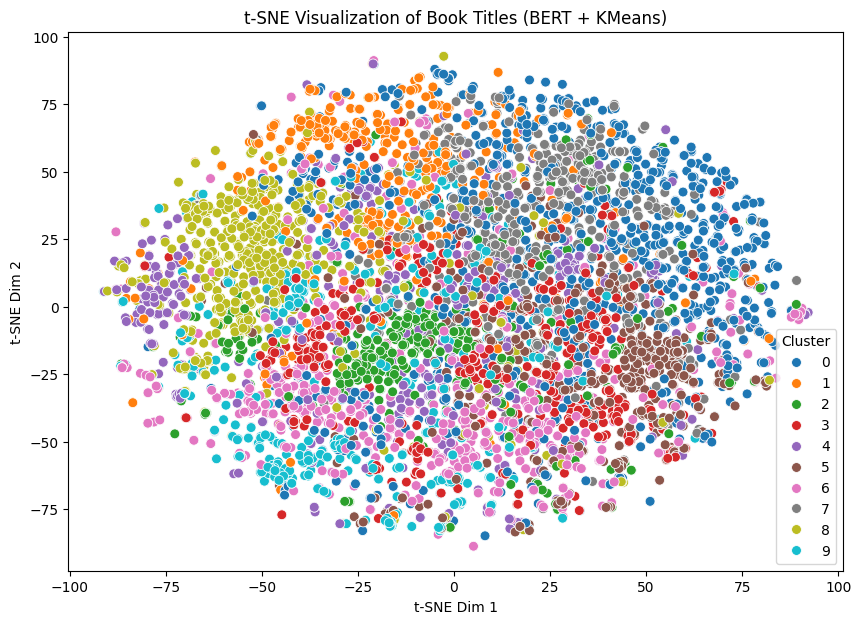

In [7]:
# ========================================
# STEP 5: Plot t-SNE result with clusters
# ========================================
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='tab10', s=50)
plt.title("t-SNE Visualization of Book Titles (BERT + KMeans)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster")
plt.savefig("tsne_clusters.png", dpi=300)
plt.show()

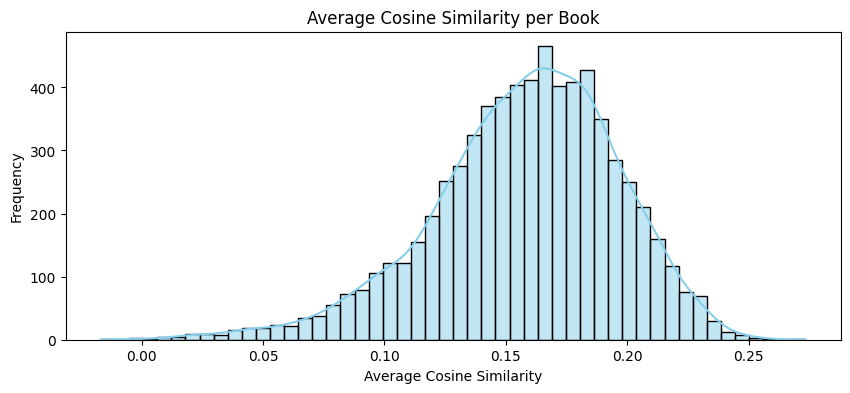

In [8]:
# ========================================
# STEP 6: Plot average cosine similarity
# ========================================
plt.figure(figsize=(10, 4))
sns.histplot(avg_sim, bins=50, kde=True, color="skyblue")
plt.title("Average Cosine Similarity per Book")
plt.xlabel("Average Cosine Similarity")
plt.ylabel("Frequency")
plt.savefig("cosine_similarity_histogram.png", dpi=300)
plt.show()

In [9]:
# ========================================
# STEP 7: Find top 10 similar books to book index 5
# ========================================
reference_index = 2710
similarities = cos_sim_matrix[reference_index]
top_indices = np.argsort(similarities)[::-1][1:11]  # Exclude self (index 0)

# Show top 10 similar books
print(f"\nTop 10 books most similar to book index {reference_index} ('{titles[reference_index]}'):\n")
print("{:<8} {:<60} {:<10}".format("Index", "Title", "Similarity"))
print("-"*80)
for idx in top_indices:
    print(f"{idx:<8} {titles[idx][:55]:<60} {similarities[idx]:.4f}")


Top 10 books most similar to book index 2710 ('Harry Potter and the Prisoner of Azkaban (Book 3)'):

Index    Title                                                        Similarity
--------------------------------------------------------------------------------
4525     Harry Potter and the Prisoner of Azkaban                     0.8933
2676     Harry Potter and the Order of the Phoenix (Book 5)           0.7429
2661     Harry Potter and the Chamber of Secrets (Book 2)             0.7398
2698     Harry Potter and the Sorcerer's Stone (Book 1)               0.7309
2723     Harry Potter and the Half-Blood Prince (Book 6)              0.7149
2697     Harry Potter and the Chamber of Secrets                      0.6969
2730     The Harry Potter Collection                                  0.6928
4508     Harry Potter and the Goblet of Fire                          0.6901
5330     JK Rowling's Harry Potter Novels                             0.6593
2712     Harry Potter                      